In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data1 = pd.read_csv('a1_data/a1_d2.csv',header = None)
X = data1.iloc[:,:-1]

In [3]:
x1 = data1[data1.iloc[:,-1] == 0].iloc[:,:-1]
x2 = data1[data1.iloc[:,-1] == 1].iloc[:,:-1]
m1 = np.mean(x1)
m2 = np.mean(x2)

mu_2 = []
mu_2.append(np.mean(x1))
mu_2.append(np.mean(x2))
mu_2 = np.array(mu_2).T

mu = np.mean(X,axis=0).values.reshape(3,1)
Nc = [len(x1), len(x2)]

B = np.dot(Nc*np.array(mu_2-mu),np.array(mu_2).T)

s_mat = []
for elem in np.array(x1-m1):
#     print(elem)
    t = np.dot((elem.reshape((-1,1))), elem.reshape(1,3))
    s_mat.append(t)
# S = np.zeros((x1.shape[1], x1.shape[1]))
S = np.sum(s_mat,axis = 0)
s_mat = []
for elem in np.array(x2-m2):
    t = np.dot((elem.reshape((-1,1))), elem.reshape(1,3))
    s_mat.append(t)
S = S + np.sum(s_mat,axis = 0)

In [4]:
Sinv = np.linalg.inv(S)
Sinv_B = Sinv.dot(B)
# print(Sinv_B)
eigval, W = np.linalg.eig(Sinv_B)
eigval, W = zip(*sorted(zip(eigval, W)))
W = W[-1]
print('Weight vector: {}'.format(W))
W = W / np.linalg.norm(W)

Weight vector: [-6.55685837e-03  1.50131262e-04  3.56628837e-01]


In [5]:
projc1 = np.dot(x1,W) / np.dot(W.T,W)
projc2 = np.dot(x2,W) / np.dot(W.T,W)
mu, sigma = norm.fit(projc1)
mu2, sigma2 = norm.fit(projc2)

Separation point: -0.38383838383838365


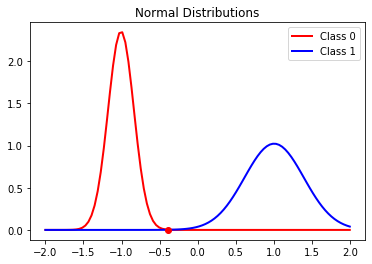

In [6]:
xmin, xmax = [-2,2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
q = norm.pdf(x,mu2,sigma2)
plt.plot(x, p, 'k', color='red',linewidth=2,label='Class 0')
plt.plot(x,q,'k',color='blue',linewidth=2,label='Class 1')
idx = np.argwhere(np.diff(np.sign(p - q))).flatten()
sep_pt = x[idx[0]]
print('Separation point: {}'.format(sep_pt))
plt.plot(x[idx], p[idx], 'ro')
plt.legend()
plt.title('Normal Distributions')
plt.show()

In [7]:
tp, tn = [0,0]
for elem in projc2:
    if elem > sep_pt:
        tp += 1
for elem in projc1:
    if elem <= sep_pt:
        tn +=1
fn = len(x1) - tp
fp = len(x2) - tn
print('True positives: {} \nTrue negatives: {} \nFalse positives: {} \nFalse negatives: {}'.format(tp, tn, fp, fn))

precision = tp / (tp+fp)
recall = tp / (tp + fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy: {}'.format(accuracy))
f_score = 2 * precision * recall / (precision + recall)
print('F-score: {}' .format(f_score))

True positives: 500 
True negatives: 500 
False positives: 0 
False negatives: 0
Accuracy: 1.0
F-score: 1.0


In [8]:
x = []
y = []
for index, rows in data1.iterrows(): 
    l = [rows[0], rows[1], rows[2]]
    x.append(l)
    y.append(int(rows[3]))

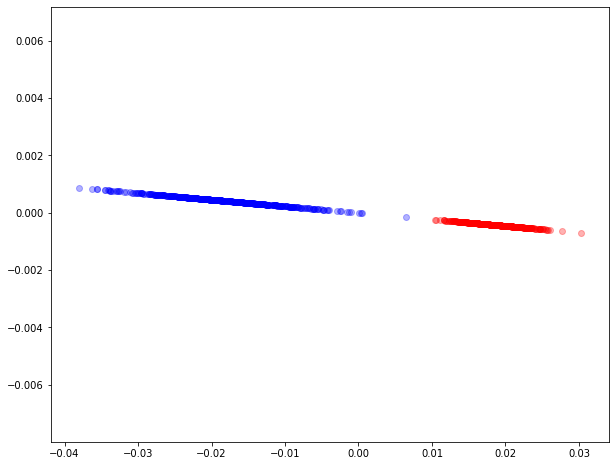

In [9]:
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(x, y):
    proj = (np.dot(point, W) * W) / np.dot(W.T, W) 
    plot = ax.scatter(proj[0], proj[1], color=colors[pred], alpha=0.3)
plt.show()